In [1]:
#5주차 데이터활용

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_excel("sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [5]:
#pivot_table :  동일한 값이 여러개 있을때 통합하여 정렬
pd.pivot_table(df, index="Name");

In [6]:
pd.pivot_table(df, index=["Name","Rep","Manager"])

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150.0,35000.0,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550.0,35000.0,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962.0,65000.0,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290.0,5000.0,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599.0,7000.0,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981.0,100000.0,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832.0,65000.0,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833.0,35000.0,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895.0,25000.0,1.500000


In [7]:
pd.pivot_table(df, index=["Manager","Rep"],values=["Price"]) #평균으로 되어 있음

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [8]:
pd.pivot_table(df, index=["Manager","Rep"],values=["Price"],aggfunc=np.sum) #aggfunc= 옵션 ,합으로 보고 싶을때 사용

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [9]:
pd.pivot_table(df, index=["Manager","Rep"],values=["Price"],aggfunc=[np.sum, np.mean],fill_value=0, margins=True) 
#fill_value :비어있는 값은 0으로 추가
#margins: 하단에 전체집계 all추가

sum          mean
                              Price         Price
Manager       Rep                                
Debra Henley  Craig Booker    80000  20000.000000
              Daniel Hilton  115000  38333.333333
              John Smith      40000  20000.000000
Fred Anderson Cedric Moss    110000  27500.000000
              Wendy Yule     177000  44250.000000
All                          522000  30705.882353

In [10]:
#-------------------------------------------------------

In [12]:
crime_anal_raw=pd.read_csv("crime_police_include_gu_name.csv", encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [13]:
crime_anal_raw=pd.read_csv("crime_police_include_gu_name.csv", encoding='utf-8', index_col=0) #0번째 열을 index로 지정
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [15]:
crime_anal=pd.pivot_table(crime_anal_raw,index='구별',aggfunc=np.sum) #구별로 통합
crime_anal.head() 

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625


In [18]:
#각 범죄별 검거율을 계산하여 컬럼 생성
crime_anal['강간검거율']=crime_anal['강간 검거']/crime_anal['강간 발생']*100
crime_anal['강도검거율']=crime_anal['강도 검거']/crime_anal['강도 발생']*100
crime_anal['살인검거율']=crime_anal['살인 검거']/crime_anal['살인 발생']*100
crime_anal['절도검거율']=crime_anal['절도 검거']/crime_anal['절도 발생']*100
crime_anal['폭력검거율']=crime_anal['폭력 검거']/crime_anal['폭력 발생']*100

In [21]:
#검거 건수는 검거율로 대체하고 삭제
#del crime_anal['강간 검거'] 잘못실행해서 전에 삭제
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

In [22]:
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,185.714286,100.000000,42.200925,83.047619


In [23]:
#검거율이 100이 넘는 경우 100으로 처리
con_list = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column]>100, column]=100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [24]:
#컬럼명에서 발생 삭제
crime_anal.rename(columns={'강간 발생':'강간',
                          '강도 발생':'강도',
                          '살인 발생' : '살인',
                          '절도 발생':'절도',
                          '폭력 발생' : '폭력'},inplace=True) #inplace를 통해 변수에도 수정된 내용 저장.
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,240,14,4,3026,2625,91.666667,100.000000,100.000000,42.200925,83.047619


In [27]:
#데이터 분석을 위한 정규화 
from sklearn import preprocessing #파이썬의 머신러닝 관련모듈 preprocessing은 전처리 도구(최소,최대를 이용해 정규화하는 함수포함)
col=['강간','강도','살인','절도','폭력']
x= crime_anal[col].values
min_max_scaler =preprocessing.MinMaxScaler() #정규화 함수(0~1의 데이터로 변환)

x_scaled=min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm=pd.DataFrame(x_scaled,columns=col, index=crime_anal.index)

col2=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm[col2]=crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619


In [30]:
CCTV_result=pd.read_csv("cctv_result.csv",encoding='utf-8')
CCTV_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552,465.422892
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535,329.342026
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413,551.503155
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673,162.948104


In [31]:
CCTV_result=pd.read_csv("cctv_result.csv",encoding='utf-8',index_col='구별')
crime_anal_norm[['인구수','CCTV']] =CCTV_result[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707


In [32]:
col

['강간', '강도', '살인', '절도', '폭력']

In [33]:
crime_anal_norm['범죄']=np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438


In [34]:
col2

['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

In [35]:
crime_anal_norm['검거']=np.sum(crime_anal_norm[col2],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211


In [36]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.472701,369.707384
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.116551,370.084431
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.494746,406.943540
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.613667,368.622261
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,91.666667,100.000000,100.000000,42.200925,83.047619,372164.0,707,2.034438,416.915211
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,58.362989,73.333333,75.000000,38.072805,80.877951,447874.0,1561,2.398678,325.647079
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,80.794702,100.000000,100.000000,56.668794,86.465433,255082.0,1015,0.589867,423.928929
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,61.421320,100.000000,100.000000,36.525308,85.530665,569384.0,1265,1.736946,383.477292
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.000000,100.000000,44.967074,87.626093,348646.0,485,0.318627,432.593167


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns #cmd 에서 C:\Users\go113\Anaconda3\Scripts 이동 후 pip install seaborn

In [38]:
%matplotlib inline

In [39]:
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager,rc

In [40]:
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name) #platform에서 여기까지 한글 깨짐 현상 확인 

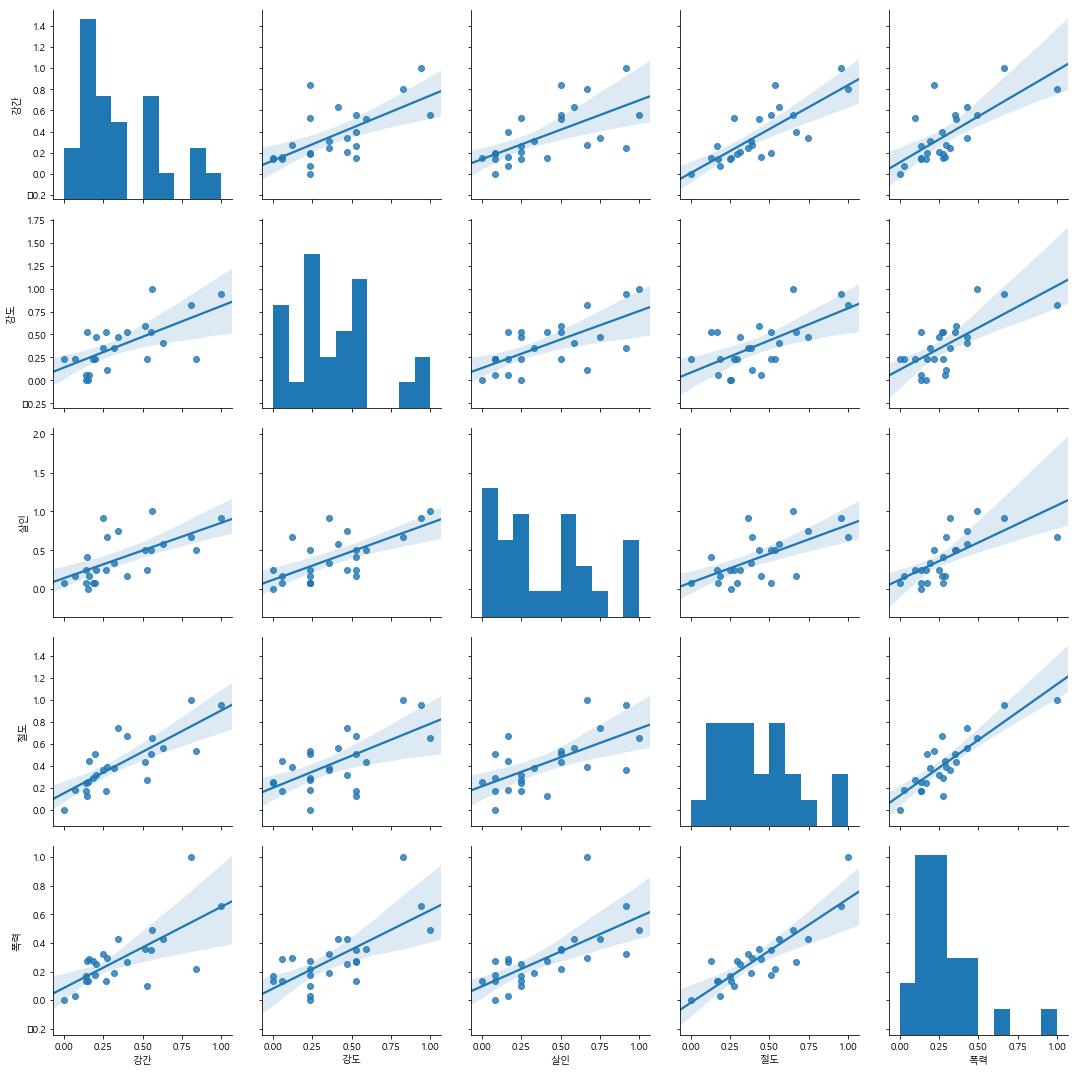

In [42]:
sns.pairplot(crime_anal_norm,vars=["강간","강도","살인","절도","폭력"],kind ='reg',size=3)
plt.show() 

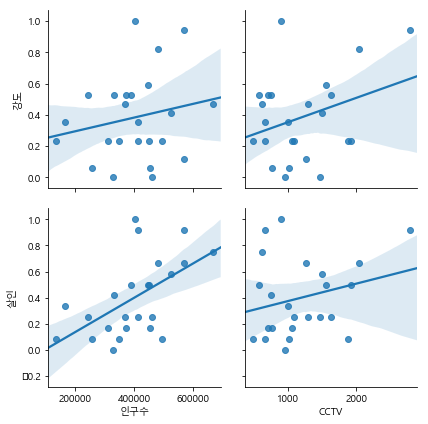

In [43]:
sns.pairplot(crime_anal_norm,x_vars=["인구수","CCTV"],y_vars=["강도","살인"],kind ='reg',size=3)
plt.show() 

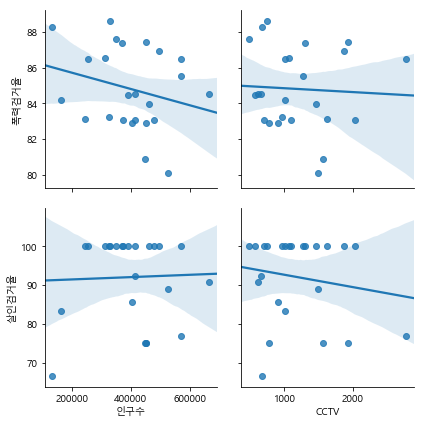

In [44]:
sns.pairplot(crime_anal_norm,x_vars=["인구수","CCTV"],y_vars=["폭력검거율","살인검거율"],kind ='reg',size=3)
plt.show() 

In [45]:
crime_anal_norm.head() #---------------------자료보고 마저 작성하기
tmp_max=crime_anal_norm['검거'].max()
crime_anal_norm['검거']=crime_anal_norm['검거']